In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import metric_learn

In [3]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [4]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data.head()

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [5]:
data.shape

(362, 1203)

In [6]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [7]:
data_np = data_df.values
data_np

array([[  753,   742,   733, ...,   872,  1080,  1081],
       [  957,   926,   898, ...,  1228,  1758,  1747],
       [ 1065,  1024,   985, ...,  1227,  1733,  1718],
       ..., 
       [65534, 62736, 51964, ..., 11869, 23117, 22547],
       [65534, 62725, 51960, ..., 11845, 23121, 22533],
       [65534, 62684, 51903, ..., 11839, 23112, 22546]], dtype=int64)

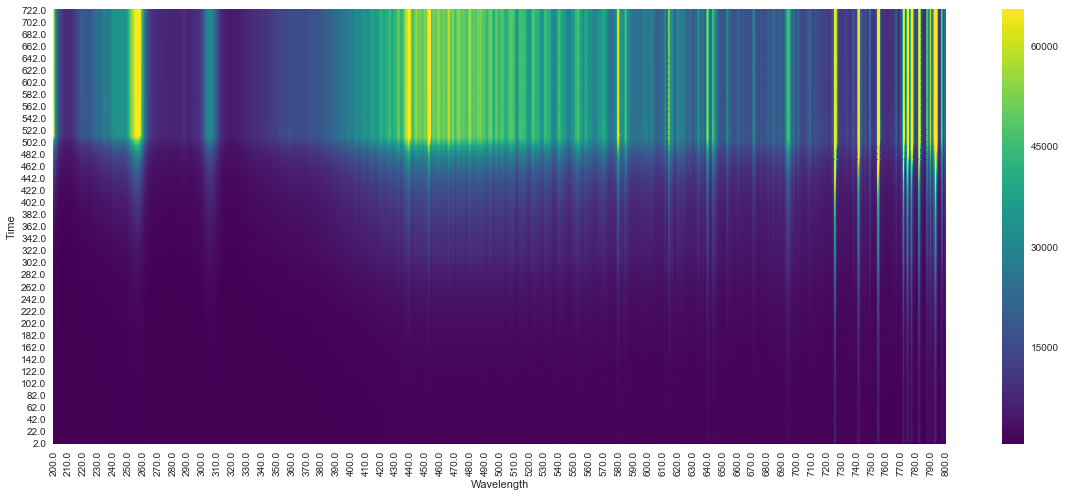

In [8]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


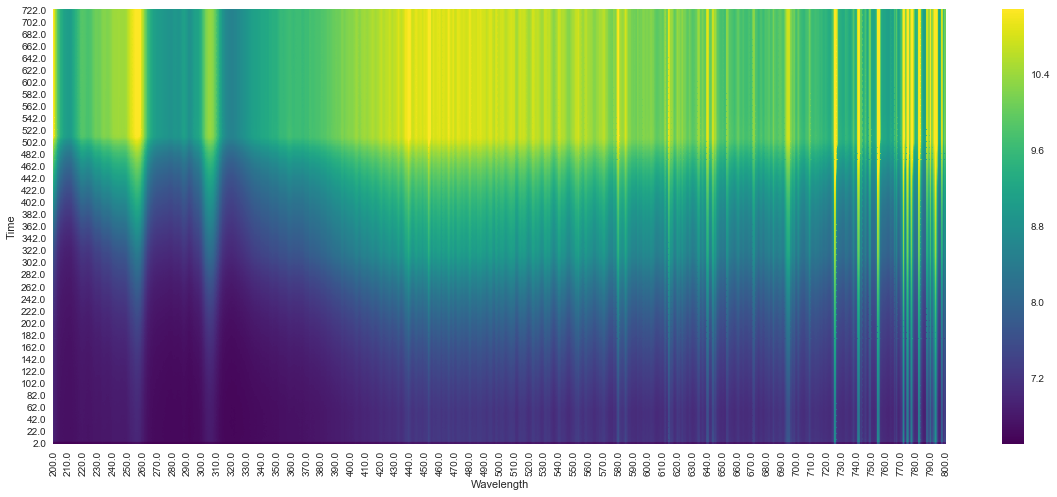

In [9]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [10]:
#look at the range of data for each column.  What is the max and min range of the columns in the dataset.
range_df = data_df.max() - data_df.min()
print(range_df.max())
print(range_df.min())
#range_df

64781
4539


In [11]:
#scaling the df by subtracting the starting row from all cells, thus each column starts at 0
scaled_df = (data_df - data_df.iloc[0,:] )
print (scaled_df.tail())

Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
Time                                                                        
716.0       64781  62002  51259  33789  27472  22769  19162  16428  14364   
718.0       64781  61967  51200  33776  27480  22713  19138  16417  14341   
720.0       64781  61994  51231  33748  27449  22733  19173  16423  14337   
722.0       64781  61983  51227  33784  27478  22755  19144  16420  14353   
724.0       64781  61942  51170  33795  27460  22724  19143  16414  14337   

Wavelength  204.5  ...    795.5  796.0  796.5  797.0  797.5  798.0  798.5  \
Time               ...                                                      
716.0       12819  ...    11071   8814  12487  32776  46985  39129  14540   
718.0       12798  ...    11096   8826  12482  32772  46971  39107  14527   
720.0       12801  ...    11058   8818  12518  32777  46974  39119  14529   
722.0       12805  ...    11075   8820  12500  32788  46996  39129  14520  

In [12]:
#scaling the df by taking the log
log_df = log(data_df)
rangelog_df = (log_df.max()-log_df.min())
print (rangelog_df.min())
print (rangelog_df.max())

2.0402649452
4.46625914312


Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.  We may consider using log_df when performing data analysis later.


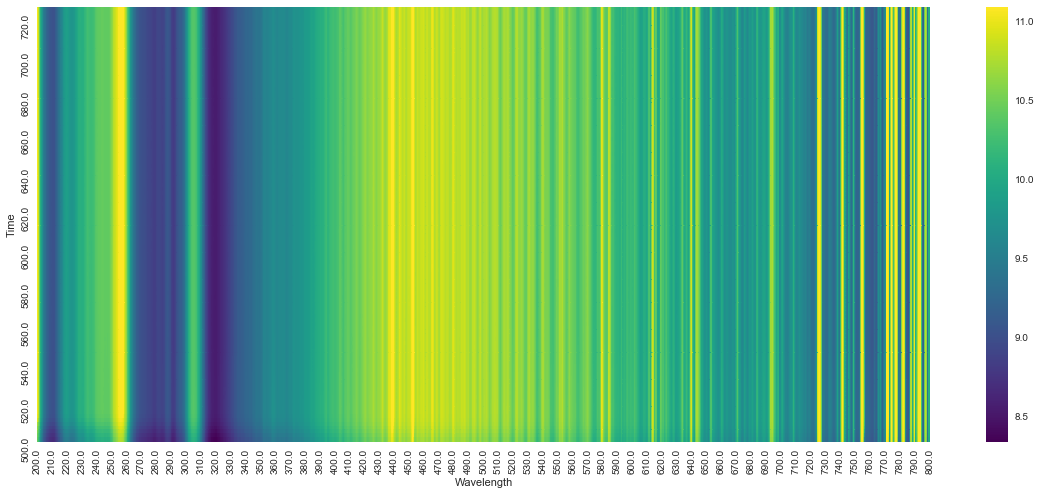

In [13]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

### Having looked at the data file for shape and conventions used in the files, we now need to get all the training data from csv files 

In [14]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    dataLists[id] = df                                        #populate dict values with each raw csv file of interest
    #dataLists[id] = log(df)                                   #populate dict values with log value csv
    
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-03-14-33-19_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO294852.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-08-17-44-47_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO305019.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-13-44-05_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308131.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-13-46-51_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308310.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-20-31-

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,736,728,720,710,704,699,694,693,693,691,...,876,834,910,1307,1571,1416,956,879,1099,1090
4.0,917,890,864,839,820,803,795,788,782,776,...,1259,1142,1347,2415,3135,2717,1463,1278,1861,1828
6.0,1045,1003,965,928,898,877,860,847,838,830,...,1262,1148,1358,2390,3081,2674,1462,1281,1844,1812
8.0,1053,1010,970,931,902,880,862,849,839,830,...,1251,1142,1342,2346,3019,2625,1451,1269,1810,1778
10.0,1052,1008,967,930,905,878,860,849,838,828,...,1249,1143,1334,2325,2993,2607,1448,1264,1791,1763


In [15]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
print (len(dataLists))

170


In [16]:
'''debug cell - confirm a selected dict value for correctness'''

d = dict((k, v) for k, v in dataLists.items() if '307365' in k)
for i in d:
    dfcheck = d[i]
dfcheck.head()


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,754,742,735,726,716,709,707,706,703,700,...,873,829,902,1283,1561,1426,964,876,1086,1086
4.0,959,928,899,870,846,832,818,809,804,799,...,1234,1118,1310,2307,3033,2673,1456,1249,1800,1792
6.0,1073,1029,988,951,920,893,878,864,853,845,...,1237,1125,1311,2275,2973,2628,1459,1248,1771,1767
8.0,1073,1030,986,945,911,888,872,862,852,843,...,1220,1115,1296,2229,2905,2569,1436,1236,1743,1734
10.0,1074,1030,986,949,916,892,874,860,851,842,...,1215,1112,1290,2193,2861,2540,1424,1226,1723,1716


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [17]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('7AData_Shared_WorkingFile.csv')
raw_Errors.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,7A,1,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
1,7A,2,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
2,7A,3,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
3,7A,4,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
4,7A,5,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN


In [18]:
raw_Errors.Error.dropna().describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

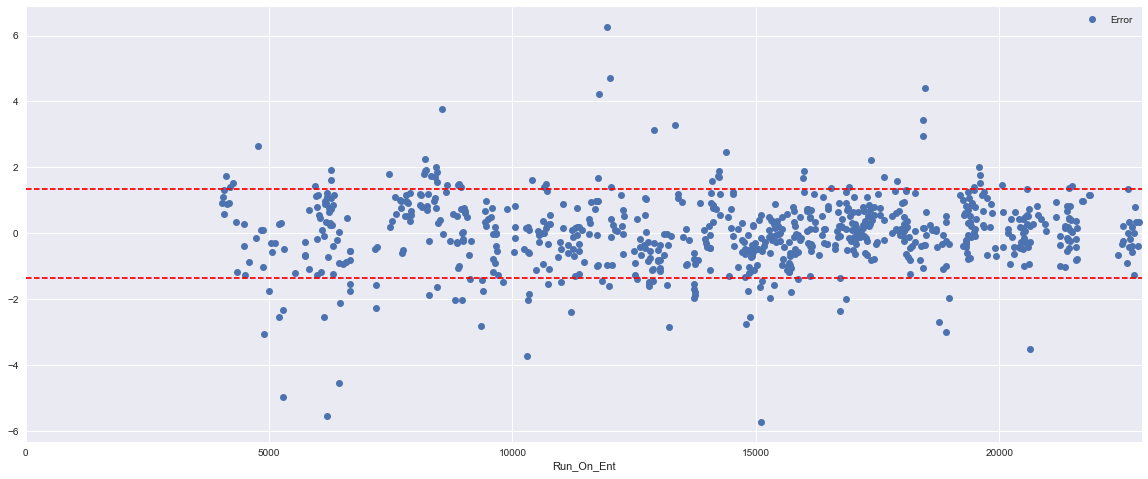

In [19]:
'''scatterplot with 2s cutoff lines shown'''
stdcut = 1.25   #number of standard deviation to draw the cutoff for anomalous pts.
cutoff = stdcut * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [20]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
                              
#clas_Errors.set_index('Lot', inplace = True)
clas_Errors.loc[clas_Errors['Label'] == 1].count()                                 #show anomylous rows ('Label' = 1)


Entity    113
Lot       113
Error     113
Label     113
dtype: int64

In [21]:
clas_Errors.loc[clas_Errors['Label'] == 1]

,Entity,Lot,Error,Label
Run_On_Ent,,,,
4121,7A,261779,1.738,1
4204,7A,263940,1.408,1
4269,7A,264297,1.525,1
4772,7A,263522,2.642,1
4897,7A,266218,-3.042,1
4991,7A,264444,-1.744,1
5206,7A,266633,-2.543,1
5281,7A,266721,-4.980,1
5283,7A,268323,-2.335,1


### we can see there will be 32 anomalous pts possible in the Errors data.  They must have a match to the 491 datafiles available in dataLists.  Our max is 32/491 if all are found.

In [22]:
print (type(clas_Errors)) 

<class 'pandas.core.frame.DataFrame'>


In [23]:
print (type(dataLists)) 

<class 'dict'>


In [24]:
#checking and saving matches between Errors and spectra available.
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    #print ('k=',k)
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]
    #print('id=',id)
    ndf = clas_Errors[clas_Errors.Lot == id]    ###clas_Errors.index if we index in the table of cell above
    if len(ndf) > 0:
        category = (ndf.iloc[-1]['Label'])
        dataLists2[k] = (category, dataLists[k])
        matchcounter +=1
        #print(dataLists2[k])
    else: 
        '''Lot not in dataLists'''
        #dataLists2[k] = (None, dataLists[k])  --> don't keep non-matching data
        missingcounter += 1
        #print ('not found', id)
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
#dataLists2

missing 46
match 124


In [25]:
#dataLists2

In [26]:
# right away we are missing 90 runs in our spectra that are not in the clas_Errors (not error data available)

In [27]:
y = {} # our labels
X = {} # our spectra data
cnt = 0
for k,(label, spectra) in dataLists2.items():
    y[k] = label
    X[k] = spectra
    if label == 1: cnt +=1
    last = k
print ('last key', k)
#X[k].head()
y_lotlabel = dict(y)

print ('found anomylous pts:', cnt)
print ('total pts:', len(y))
y_lotlabel.values()

last key ['IMO318134A']
found anomylous pts: 7
total pts: 124


dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Now we see our dataset is 33 anomalous pts out of 401 available

In [28]:
print('length of X should match 401:', len(X))

length of X should match 401: 124


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [29]:
y = [] # our labels list
X = [] # our spectra data
y_lotlabel2 = {}

for k,(label, spectra) in dataLists2.items():
    y.append(label)
    X.append(spectra.values)
    y_lotlabel2[k]=label
#    if spectra.shape[0] < minim: minim = spectra.shape[0]
    last = k
    #print (y, k, '\n')
    
print(type(X))
#print('minum')

y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)
print('y shape:', y.shape)
#print(X)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
print('X shape:', X.shape)
#print('last spectra array \n',X[-1])

<class 'list'>
X shape: (124, 350, 1201)
y shape: (124,)
reshaped d2_X: (124, 420350)
labels y shape: 124
X shape: (124, 350, 1201)


In [30]:
#attempt metric learn  or R w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2] 
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

reshaped d2_X: (124, 210175)
labels y shape: 124


'''USING E2C FOR MEMORY ISSUES'''

### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_R_anom = []
x_R_good = []
for k,(label, spectra) in dataLists2.items():
    if label == 1:
        y_R_anom.append(spectra.values)
    else: 
        x_R_good.append(spectra.values)

#Create flattened numpy arrays for R that have samples as columns and features as rows
y_R_anom = (numpy.array(y_R_anom))  
nsamples,nx,ny = y_R_anom.shape
d2_y_R_anom = y_R_anom.reshape((nsamples,nx*ny)).T

x_R_good = (numpy.array(x_R_good))
nsamples,nx,ny = x_R_good.shape
d2_x_R_good = x_R_good.reshape((nsamples,nx*ny)).T

print (d2_y_R_anom.shape)
print (d2_x_R_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_anom.csv', d2_y_R_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_good.csv', d2_x_R_good, fmt='%d', delimiter=',')

In [96]:
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_Re2c_anom = []
x_Re2c_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
y_Re2c_anom = y_R_anom[:,::2]  
nsamples,nx,ny = y_Re2c_anom.shape
d2_y_Re2c_anom = y_Re2c_anom.reshape((nsamples,nx*ny)).T

x_Re2c_good = x_R_good[:,::2]
nsamples,nx,ny = x_Re2c_good.shape
d2_x_Re2c_good = x_Re2c_good.reshape((nsamples,nx*ny)).T

print (d2_y_Re2c_anom.shape)
print (d2_x_Re2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

NameError: name 'y_R_anom' is not defined

# Run all above here

### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_Rfilt_anom = []
x_Rfilt_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
#y_Re2c_anom = y_R_anom[:,::2]  




nsamples,nx,ny = y_Re2c_anom.shape
d2_y_Re2c_anom = y_Re2c_anom.reshape((nsamples,nx*ny)).T

x_Re2c_good = x_R_good[:,::2]
nsamples,nx,ny = x_Re2c_good.shape
d2_x_Re2c_good = x_Re2c_good.reshape((nsamples,nx*ny)).T

print (d2_y_Re2c_anom.shape)
print (d2_x_Re2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

In [33]:
d2_y_R_anom

array([[  678,   679,   676, ...,   681,   677,   681],
       [  675,   675,   674, ...,   681,   676,   679],
       [  674,   674,   672, ...,   680,   676,   677],
       ..., 
       [ 6265,  6255,  6230, ...,  5518,  5510,  5642],
       [11626, 11585, 11504, ..., 10004, 10045, 10265],
       [11310, 11405, 11088, ...,  9825,  9874, 10086]], dtype=int64)

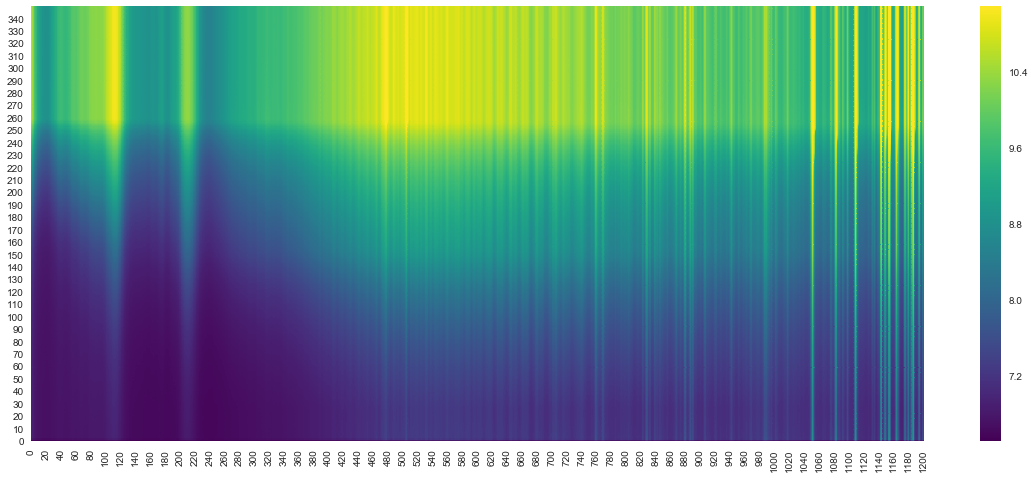

In [34]:
#spot check plot of the last spectra array element showing that the data indeed appears intact & correct
some_spectra_image = X[-1]
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()          

In [228]:
#calculate and plot std over each column in the spectra_image
print('X shape:', X.shape)
print (type(X))
X_var = {}
#print (X[-1].size)
#for image in X: #(label, spectra) in  X:
    #print (image.size)
    #X_var = np.var(X[image])
#std_df = numpy.std(X_concat, axis = 0)
#ax = plot(std_df)
#plt.xlim((0,1200))
i = 0
for spectra in X:
    X_var[i] = numpy.var(spectra, axis = 0)
    i+=1
print (X_var)
#X_meanvar = numpy.mean(X_var, axis = 0)
#ax = plot(X_meanvar)

X shape: (124, 350, 1201)
<class 'numpy.ndarray'>
{0: array([  7.51892010e+08,   7.19612036e+08,   5.17136423e+08, ...,
         1.88269957e+07,   7.63159540e+07,   7.25463070e+07]), 1: array([  8.11544184e+08,   7.42058791e+08,   5.05445412e+08, ...,
         2.02976179e+07,   8.24639438e+07,   7.84438847e+07]), 2: array([  7.74606515e+08,   7.04181223e+08,   4.77246236e+08, ...,
         1.95699999e+07,   7.90841730e+07,   7.49774408e+07]), 3: array([  8.03265534e+08,   7.40370790e+08,   5.08577775e+08, ...,
         2.02143657e+07,   8.15826930e+07,   7.76475610e+07]), 4: array([  7.57112244e+08,   7.06449100e+08,   4.93124348e+08, ...,
         1.88874386e+07,   7.54673362e+07,   7.17449896e+07]), 5: array([  7.60057108e+08,   7.14224559e+08,   5.02352283e+08, ...,
         1.87874288e+07,   7.47633747e+07,   7.11301299e+07]), 6: array([  7.91729978e+08,   7.43940289e+08,   5.22739831e+08, ...,
         1.95284814e+07,   7.79964741e+07,   7.49116247e+07]), 7: array([  7.40780404e+0

(1201,)


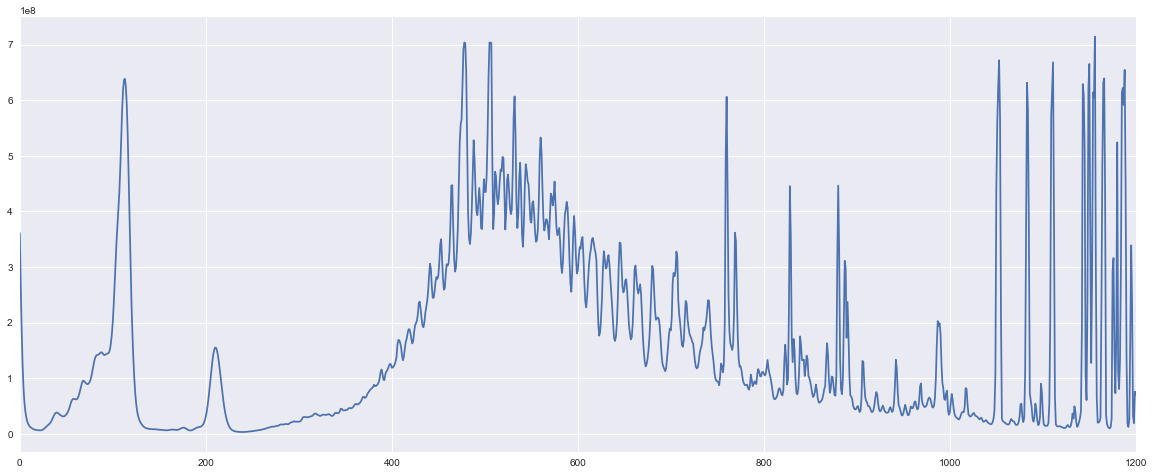

In [230]:
#calculate and plot std over each column in the spectra_image
var_df = numpy.var(some_spectra_image, axis = 0)
ax = plot(var_df)
plt.xlim((0,1200))
print (var_df.shape)

In [231]:
len(X)

124

(0, 1200)

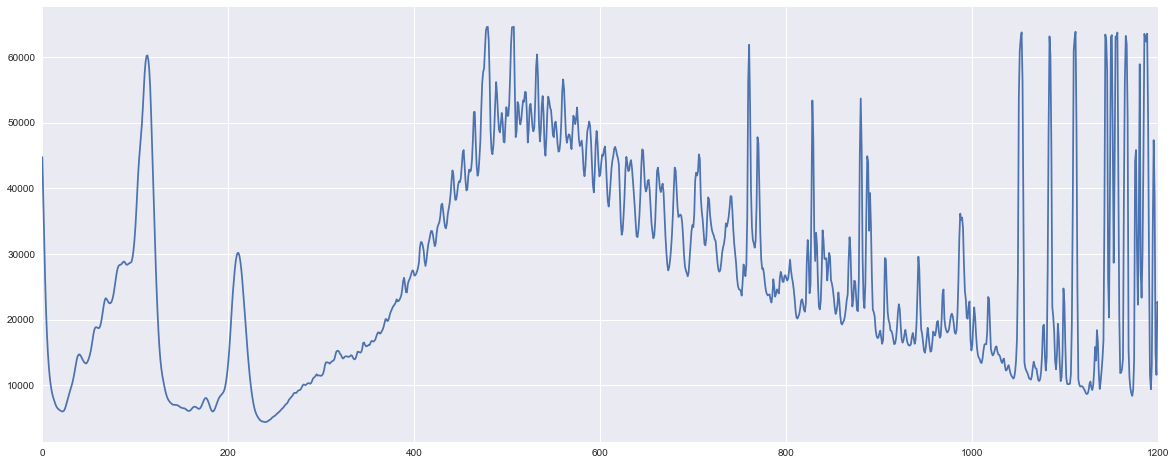

In [232]:
#calculate and plot std over each column in the spectra_image
range_df = numpy.ptp(some_spectra_image, axis = 0)
ax = plot(range_df)
plt.xlim((0,1200))

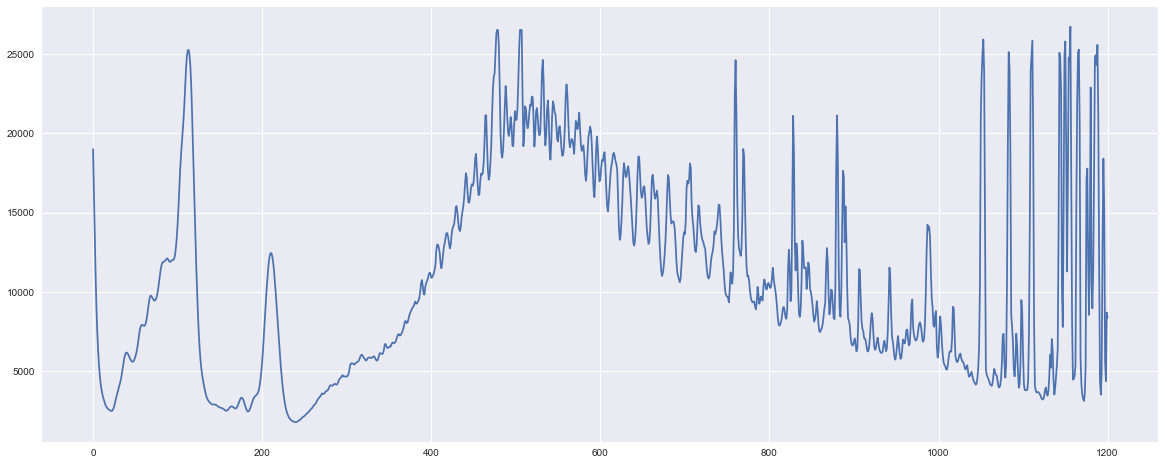

In [233]:
#calculate and plot std over each column in the spectra_image
std_df = numpy.std(some_spectra_image, axis = 0)
ax = plot(std_df)

### Now we can attempt to use the data for training

### PCA w log(df) values as the feature scaler

In [31]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#use this code snip to preprocess data using minmax scalar
#min_max_scaler = preprocessing.MinMaxScaler()
#d2_X_minmax = min_max_scaler.fit_transform(d2_X)

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit(log(d2_X))     #this line will run on the flattened d2_X
#pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1[:10])

The minimum number of dimensions to retain 95% variance =  4
[ 80.06  87.89  93.21  95.19  96.56  97.33  97.88  98.18  98.45  98.65]


(0, 15)

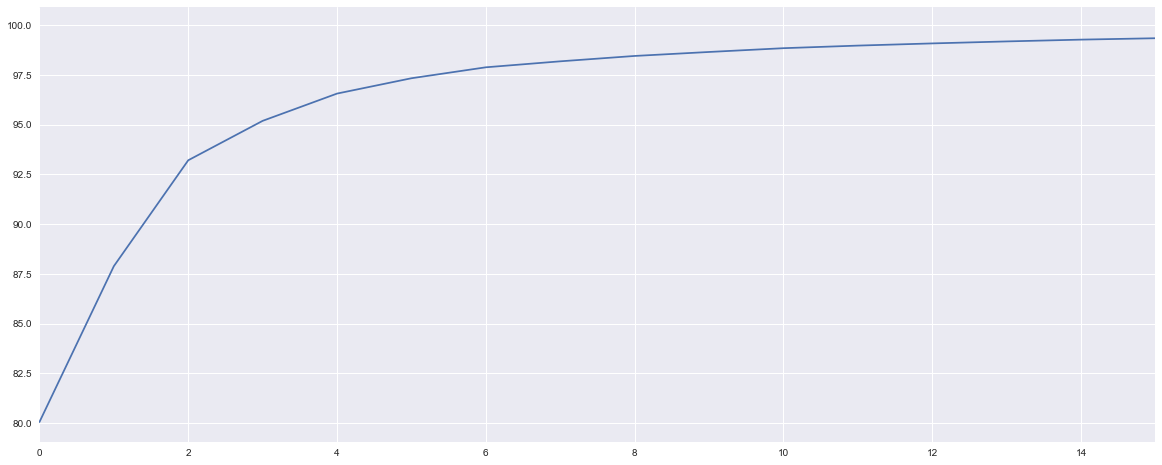

In [32]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,15])
#note the dimensions start at 0, so 95% is +1

In [33]:
# we will run PCA formatted to retain 95% of variance by inserting value between 0-1.  
# this will get us to 4D in this short example.
pca = PCA(n_components = 5)
X_reduced = pca.fit_transform(log(d2_X),y)   # using log transform of data
print (X_reduced.shape)
#print (X_reduced)

(124, 5)


In [101]:
print(len(y))

124


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


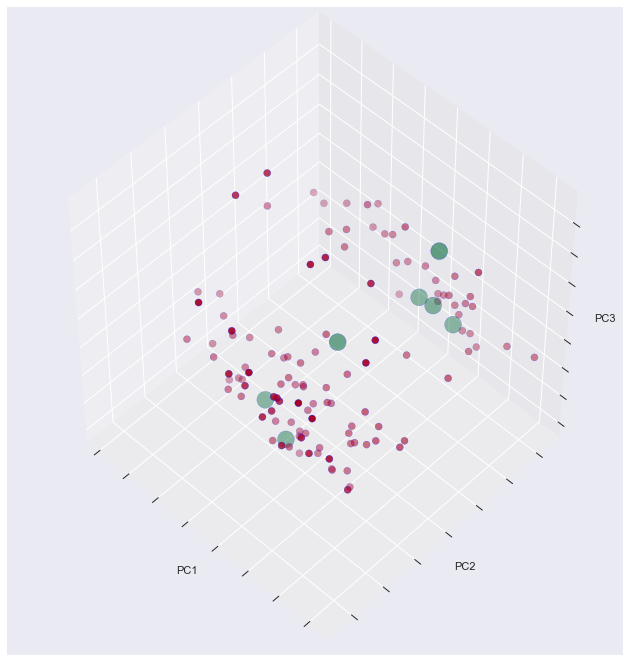

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(y)
fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=y, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

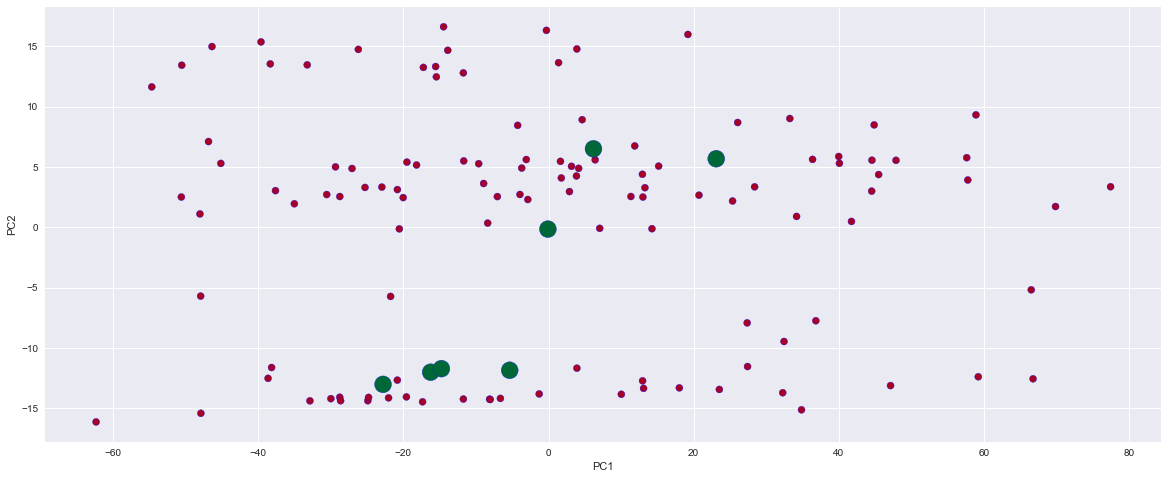

In [35]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

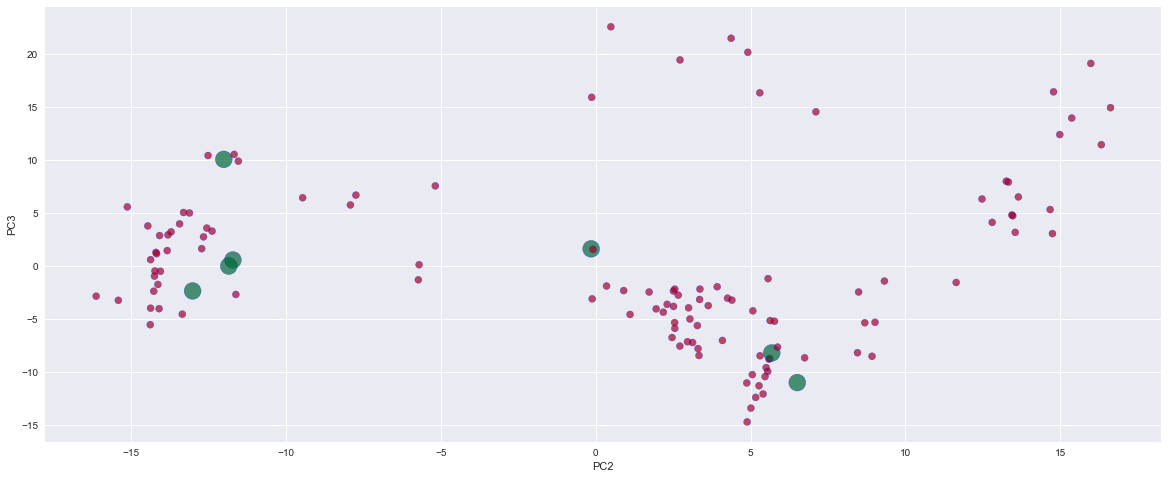

In [36]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

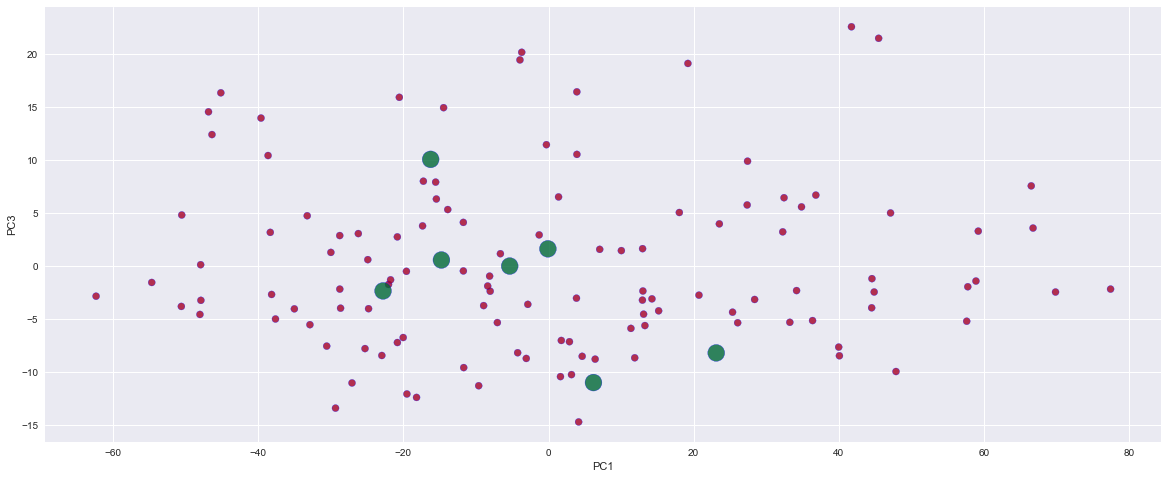

In [37]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

MemoryError: 

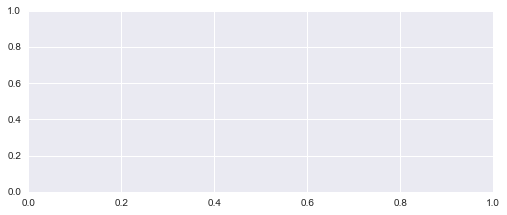

In [76]:
# what is we assign a classification bounday on just PC1/PC2 and plot this predictor on the 'Error' plot.  Does this 
# ~90% explanion of variance make sense?

from sklearn import svm
lin_svc = svm.LinearSVC(C=5).fit(X_reduced[:,:2], y)

h = .02  # step size in the mesh
titles = 'Linear SVC'
# create a mesh to plot in
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplot(2, 2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
 
plt.show()

### Kernel PCA exploration

In [38]:
#only kPCA with RBF kernel
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=3, kernel = 'rbf', gamma = .01)
X_reduced = rbf_pca.fit_transform(log(d2_X_e2c))

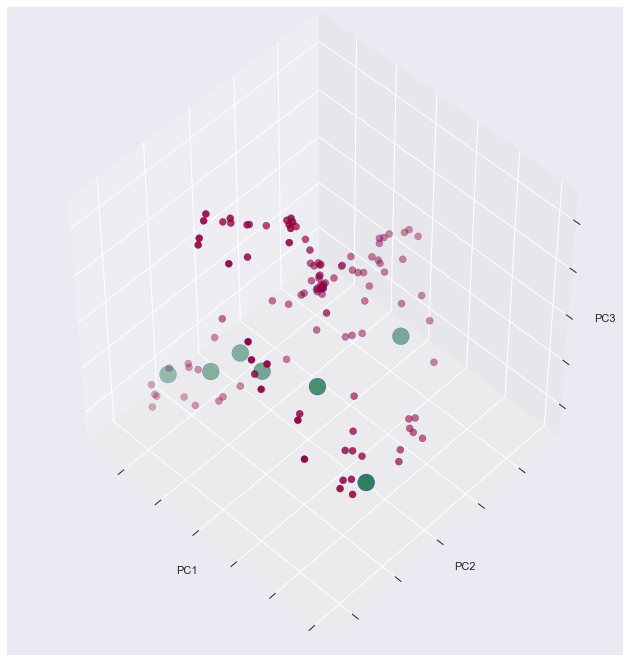

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#print(y)
fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=y, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

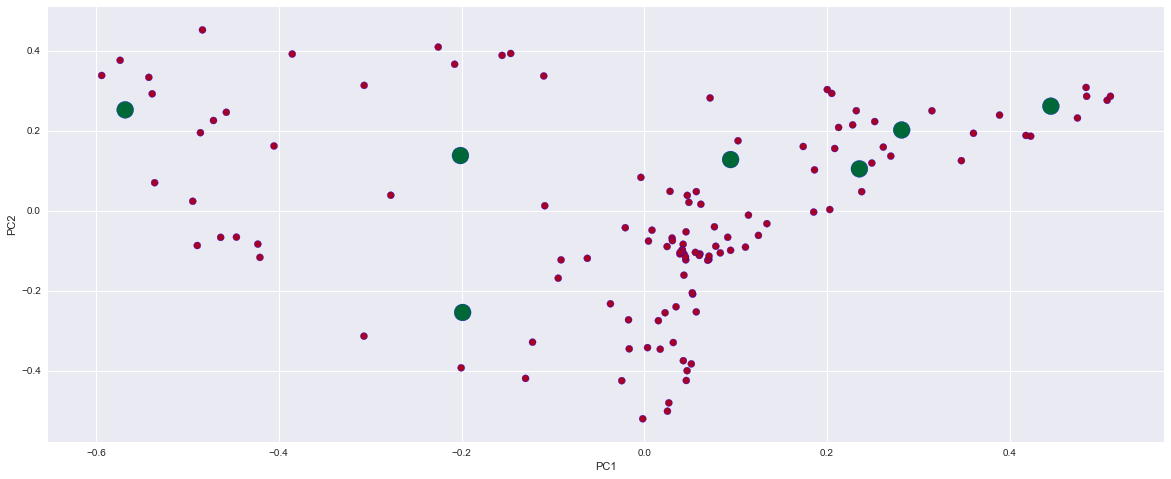

In [40]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

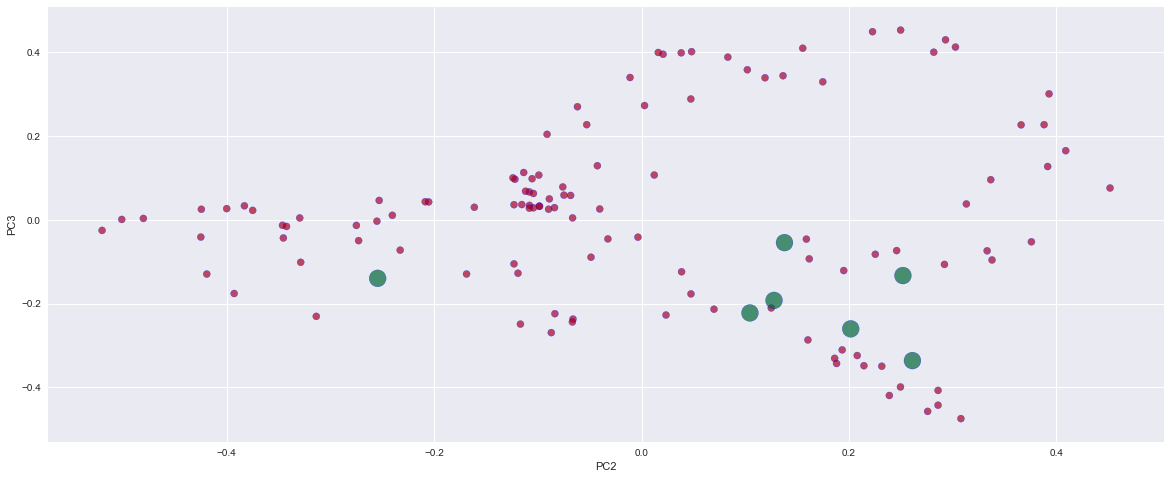

In [41]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

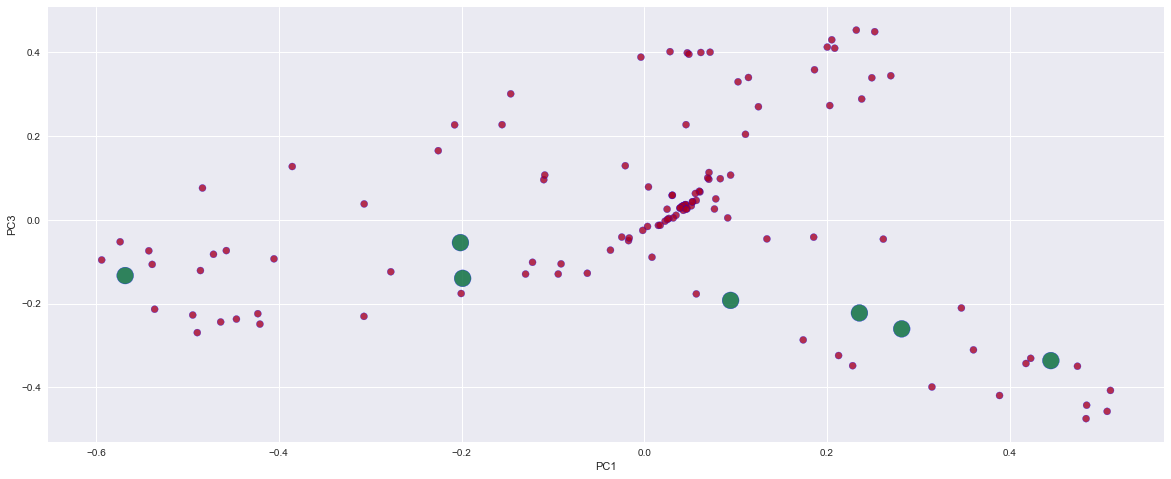

In [42]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=y, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

### Local Linear Embedding Manifold Learning

In [43]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle = LLE(n_components = 3, n_neighbors =10)
X_reduced = lle.fit_transform(log(d2_X_e2c))

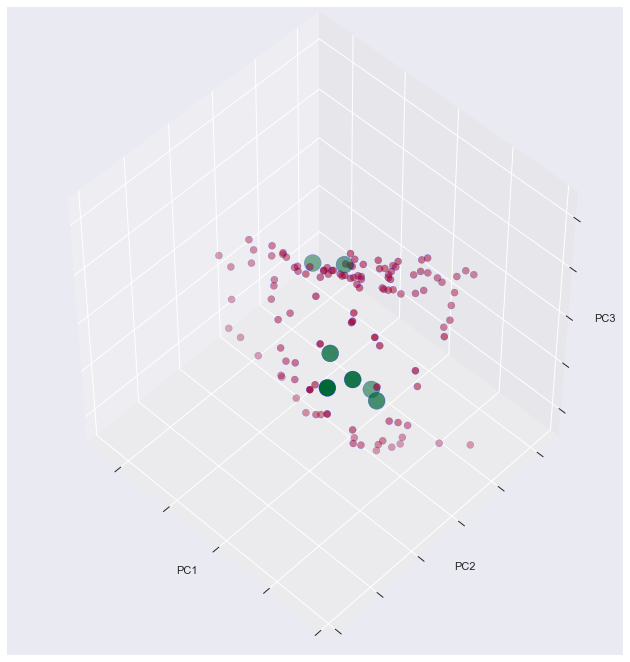

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#print(y)
fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=y, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

### Poly SVM 

In [35]:
#Poly SVM with the first 2 initial principal components
from sklearn import svm
poly_kernel_svm_clf = svm.SVC(kernel = 'poly', degree=2, coef0=1, C=5)
poly_kernel_svm_clf.fit(X_reduced[:,:2], y)
poly_kernel_svm_clf.score(X_reduced[:,:2], y)

NameError: name 'X_reduced' is not defined

In [ ]:
h = .02  # step size in the mesh
titles = 'SVC polynomial (d=4)'
# create a mesh to plot in
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplot(2, 2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
 
plt.show()

In [247]:
from sklearn import svm
poly_kernel_svm_clf = svm.SVC(kernel = 'poly', degree=4, coef0=1, C=5)
poly_kernel_svm_clf.fit(X_reduced, y)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [248]:
poly_kernel_svm_clf.predict(X_reduced) #Need some actual Test data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Returning data from R after conditional t-test of features. 
#### There are 2 versions returned from R which are vectors of column ids that are significant based on filtering by significance test results and pooled deviations.  
##### z_e2c_initsignif.csv has less filtering applied for just 0.99 significance
##### z_e2c_smallersignif.csv filters initsignif for |T| > 10 and Sd < 500

In [ ]:
####NEED TO CONVERT THE SIM DATA AS E2C, THEN FILTER TO THE 400 FROM SMALLERSIGNIF AND FEED THAT D2_X_SIM INTO TEST

In [45]:
# the vectors from R will need to be transpose and then used for column slicing to trim down our data.
initsignif_e2c = pd.read_csv('C:/Users/mabock/AnacondaProjects/data/Capstone2/from_R_data/z_e2c_initsignif.csv').T
smallersignif_e2c = pd.read_csv('C:/Users/mabock/AnacondaProjects/data/Capstone2/from_R_data/z_e2c_smallersignif.csv').T

print ("initsignif_e2c", initsignif_e2c.shape)
print ('smallersignif_e2c', smallersignif_e2c.shape)
print ('Spectra Data e2c', d2_X_e2c.shape)
smallersignif_e2c.shape

initsignif_e2c (2, 16398)
smallersignif_e2c (2, 441)
Spectra Data e2c (124, 210175)


(2, 441)

In [46]:
#create numpy vector of significant rows
smallersignif_e2c = numpy.array(smallersignif_e2c.drop(['Unnamed: 0']))
initsignif_e2c = numpy.array(initsignif_e2c.drop(['Unnamed: 0']))
#smallersignif_e2c

In [47]:
d2_X_e2c

array([[  743,   734,   725, ..., 11725, 22933, 22384],
       [  753,   743,   732, ..., 11921, 23278, 22730],
       [  753,   742,   733, ..., 11846, 23121, 22527],
       ..., 
       [  743,   731,   721, ..., 11814, 22722, 21996],
       [  742,   733,   724, ..., 11996, 23214, 22434],
       [  739,   732,   723, ..., 11870, 22888, 22085]], dtype=int64)

In [48]:
signif_d2_X_e2c_small = numpy.squeeze(d2_X_e2c[:,smallersignif_e2c], axis = 1)
signif_d2_X_e2c_init = numpy.squeeze(d2_X_e2c[:,initsignif_e2c], axis = 1)

print(signif_d2_X_e2c_small.shape)
print(signif_d2_X_e2c_init.shape)

#now we have our filtered initial-significant and smaller-significant spectra arrays to run in SVM

(124, 441)
(124, 16398)


#does PCA on the condT data yield a different result for PCs vs variance 
from sklearn.decomposition import PCA
from sklearn import preprocessing

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit(log(signif_d2_X_e2c_small))     #this line will run on the flattened d2_X
#pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1)

### which features in linear SVM are the most important? = must use linear SVM but column of wavelenght is lost at this point???

from sklearn import svm
small_poly_kernel_svm_clf = svm.SVC(kernel = 'poly', degree=4, coef0=1, C=5)
small_poly_kernel_svm_clf.fit(signif_d2_X_e2c_small, y)
#small_poly_kernel_svm_clf.score(signif_d2_X_e2c_small, y)

init_poly_kernel_svm_clf = svm.SVC(kernel = 'poly', degree=4, coef0=1, C=5)
init_poly_kernel_svm_clf.fit(signif_d2_X_e2c_init, y)
#init_poly_kernel_svm_clf.score(signif_d2_X_e2c_init, y)

##### Now lets generate some simulated test data to check our model accuracy 

In [94]:
#this cell will randomly select 10 runs from the list of runs in dataLists and create a simulated test case for initial model 
#validations.  The 10 anomalous runs will mimic a short 30s plasma instability by perturbation of the 

import random

#function to generate random perturbation start and length
def Perturbation():
    times = []
    
    t = random.randint(10,60)            #generate a random length of simulated instability
    times = [0]*t
    tstart = 2*random.randint(100, 300)  #generate a random even start time for the simulated instability between 200-550
    
    j = 0
    while j < len(times):                #geneate list of times that will be altered 
        if j == 0: times[j] = tstart
        else: times[j] = times[j-1] + 2  #every 2 seconds per the df index of datafiles
        j +=1

    return times

#randomly select n runs for perturbation
n = 15                                          #select more/less by altering n
outliers = random.sample(list(dataLists2), n)  
print ("List of simulated outliers:", outliers)

#create dataframe of the lot ID which will be labeled as 1|0
labels = []
for k,v in dataLists.items():
    if k in outliers:
        labels.append(k)
labels_df = pd.DataFrame(labels)
labels_df.columns = ['ID']
labels_df['Label'] = ''
labels_df.set_index('ID', inplace = True)


'''
Wavelengths that pertain to this domain that would simulate a perturbation or a real species
Cl2 = 254.4, 256.1
O2+ = 258.1
'''

#sort through runs for selected outlier matches and genrate the perturbation in the data file
dataLists_outliers = {}

for k in dataLists:
    if k in outliers:
        labels_df.at[k,'Label'] = 1
        category = labels_df.at[k,'Label']
        outlier_df = dataLists[k]
        timeslist = Perturbation()

        #cycle through time row in times list and change the output signal to simulate instability
        cnt = 0
        for i in timeslist:                         
            '''if cnt < len(timeslist)/2: 
                decay = cnt
                cnt +=1
                outlier_df.at[i, '254.0'] = outlier_df.ix[i, '254.0'] + 500*decay
                outlier_df.at[i, '254.5'] = outlier_df.ix[i, '254.5'] + 500*decay
                outlier_df.at[i, '255.0'] = outlier_df.ix[i, '255.0'] + 500*decay
                outlier_df.at[i, '255.5'] = outlier_df.ix[i, '255.5'] + 500*decay
                outlier_df.at[i, '256.0'] = outlier_df.ix[i, '256.0'] + 500*decay
                outlier_df.at[i, '256.5'] = outlier_df.ix[i, '256.5'] + 500*decay
                outlier_df.at[i, '257.0'] = outlier_df.ix[i, '257.0'] + 500*decay
                outlier_df.at[i, '257.5'] = outlier_df.ix[i, '257.5'] + 500*decay
                outlier_df.at[i, '258.0'] = outlier_df.ix[i, '258.0'] + 500*decay
            else:
                decay = decay - 1
                outlier_df.at[i, '254.0'] = outlier_df.ix[i, '254.0'] + 500*decay
                outlier_df.at[i, '254.5'] = outlier_df.ix[i, '254.5'] + 500*decay
                outlier_df.at[i, '255.0'] = outlier_df.ix[i, '255.0'] + 500*decay
                outlier_df.at[i, '255.5'] = outlier_df.ix[i, '255.5'] + 500*decay
                outlier_df.at[i, '256.0'] = outlier_df.ix[i, '256.0'] + 500*decay
                outlier_df.at[i, '256.5'] = outlier_df.ix[i, '256.5'] + 500*decay
                outlier_df.at[i, '257.0'] = outlier_df.ix[i, '257.0'] + 500*decay
                outlier_df.at[i, '257.5'] = outlier_df.ix[i, '257.5'] + 500*decay
                outlier_df.at[i, '258.0'] = outlier_df.ix[i, '258.0'] + 500*decay   '''
            if cnt < len(timeslist)/2: 
                decay = cnt
                cnt +=1
                outlier_df.at[i,:] = outlier_df.ix[i,:] + 500*decay
                
            else:
                decay = decay - 1
                outlier_df.at[i,:] = outlier_df.ix[i,:] + 500*decay
                     
        idsim = re.sub(r'([a-zA-Z0-9]+)' , r'\1_sim', k)
        dataLists_outliers[idsim] = (category, outlier_df.dropna())    #reassign the new outlier peak dataframe back to dataLists
        some_spectra = outlier_df        
    else: labels_df.at[k,'Label'] = 0                   #label lots not changed as normal

#check simulated dataLists for labels
"""
matchcounter = 0
missingcounter = 0
for k in dataLists:
    if k in labels_df.index:
        category = labels_df.at[k,'Label']
        #print (k, category)
        dataLists_sim[k] = (category, dataLists[k])
        matchcounter +=1
        #if category == 1: print(k,'\n',dataLists2[k])   #validation line for checking all the outliers
    else: 
        '''Lot not in dataLists'''
        missingcounter += 1
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
"""
dataLists_withsim = {**dataLists2, **dataLists_outliers}  #create new dictionary by merging outliers to the labeled dataLists
#print (len(dataLists2))
#print (len(dataLists_outliers))
#print (dataLists_withsim)

y_simtest = {} # our simulation labels
X_simtest = {} # our simulation spectra data
for k,(label, spectra) in dataLists_withsim.items():
    y_simtest[k] = label
    X_simtest[k] = spectra
    last = k
#print ('last key', k)
#X_simtest[k].head()
print ('X_simtest should be dict:',type(X_simtest))
print (len(y_simtest))
#print (shape(dataLists_sim))

List of simulated outliers: ["['IMO314601']", "['IMO316322']", "['IMO309320']", "['IMO306641A']", "['IMO312476']", "['IMO307236']", "['IMO294847']", "['IMO310176']", "['IMO309658A']", "['IMO316706']", "['IMO313578']", "['IMO306185']", "['IMO310349']", "['IMO311974A']", "['IMO314770']"]
X_simtest should be dict: <class 'dict'>
139


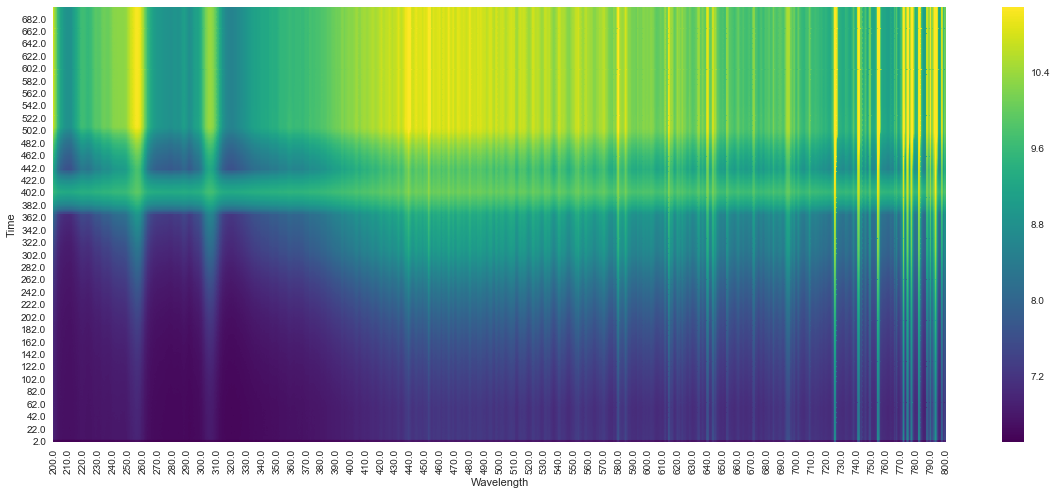

In [95]:
#heat map for new created anomylous samples.  This example is the last one generated with perturbation.
some_spectra_image = some_spectra
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()         

In [96]:
#unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays 
#suitable for sklearn modules.

y_simtest = [] # our labels list
X_simtest = [] # our spectra data
y_simlotlabel = {}
#X_e2c = X[:,::2] X shape: (124, 350, 1201)
    
for k,(label, spectra) in dataLists_withsim.items():
    y_simtest.append(label)
    X_simtest.append(spectra.values)
    y_simlotlabel[k]=label
    last = k
  
print(type(X_simtest))

y_simtest = (numpy.array(y_simtest))  
X_simtest = (numpy.array(X_simtest))       #give me a 3-D array (124,350,1201)

print('X shape:', X_simtest.shape)
print('y shape:', y_simtest.shape)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 420350
nsamples,nx,ny = X_simtest.shape
d2_X_simtest = X_simtest.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_simtest.shape)
print('labels y shape:', len(y_simtest))
#print('X shape:', X_simtest.shape)
#print('last spectra array \n',X[-1])
print(y_simtest)

<class 'list'>
X shape: (139, 350, 1201)
y shape: (139,)
reshaped d2_X: (139, 420350)
labels y shape: 139
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [97]:
#let's reducte to every other column to match the CondT results from before on the training
X_e2c_simtest = X_simtest[:,::2]
nsamples,nx,ny = X_e2c_simtest.shape
d2_X_e2c_simtest = X_e2c_simtest.reshape((nsamples,nx*ny))
print('reshaped d2_X_e2c_simtest:', d2_X_e2c_simtest.shape)
print('labels y_simtest shape:', len(y_simtest))
#print('last spectra array \n',X[-1])               
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

'''we should get a reshape 2D array of (number of samples)x210175'''

reshaped d2_X_e2c_simtest: (139, 210175)
labels y_simtest shape: 139


'we should get a reshape 2D array of (number of samples)x210175'

In [98]:
'''We know the significant columns from CondT test in R and have them saved as:
smallersignif_e2c is the smallest set of features 441 count.
initsignif_e2c is the initial cut (still fairly large number of features at 16.4k).
this will filter the simulated data to only use the significant columns from CondT.
'''
signif_d2_X_e2c_simtest_small = numpy.squeeze(d2_X_e2c_simtest[:,smallersignif_e2c], axis = 1)
signif_d2_X_e2c_simtest_init = numpy.squeeze(d2_X_e2c_simtest[:,initsignif_e2c], axis = 1)

print(signif_d2_X_e2c_simtest_small.shape)
print(signif_d2_X_e2c_simtest_init.shape)

#now we have our filtered initial-significant and smaller-significant spectra arrays to run in SVM

(139, 441)
(139, 16398)


##### using a gridsearch to optimize hyperparameters before kfold

In [118]:
#create gridsearch parameter 
from sklearn.grid_search import GridSearchCV
svm_clf = SVC()
#parameters = {'kernel': ('linear','rbf','poly'), 'C':[.1,1,10],'gamma': [1e-7, 1e-4], 'degree':[2,3,4]}
parameters = {'kernel': ('rbf', 'linear'), 'C':[.01,.1,1],'gamma': [0.01,.1,1], 'degree':[2,3,4] }

#run gridserach over our dataset
small_kernel_svm_clf = GridSearchCV(estimator = svm_clf, param_grid=parameters, cv=4)
small_kernel_svm_clf.fit(signif_d2_X_e2c_simtest_small, y_simtest)
init_kernel_svm_clf = GridSearchCV(estimator = svm_clf, param_grid=parameters, cv=4)
init_kernel_svm_clf.fit(signif_d2_X_e2c_simtest_init, y_simtest)

print('best parameters and model:',small_kernel_svm_clf.best_params_)
print('best score over small CondT test set:', small_kernel_svm_clf.best_score_)

print('best parameters and model:',init_kernel_svm_clf.best_params_)
print('best score over init CondT test set:', init_kernel_svm_clf.best_score_)



best parameters and model: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
best score over entire test set: 0.841726618705036
best parameters and model: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
best score over entire test set: 0.841726618705036


In [103]:
#cross validation on simulated dataset for the small simtest results using Condt and optimized GridSearch values
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
small_svm_clf = SVC(kernel = 'rbf', degree = 2, gamma = 0.01, C=0.01)
scores = cross_val_score(small_svm_clf, signif_d2_X_e2c_simtest_small, y_simtest, scoring ='neg_mean_squared_error', cv=3)
poly_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std Dev:', scores.std())

display_scores(poly_rmse_scores)

Scores: [ 0.4125685   0.39009475  0.39009475]
Mean: 0.397585998703
Std Dev: 0.0105942272081


##### using cross-validation on cv=3 to optimize the model fit with extra simulated anomalies

In [104]:
#cross validation on simulated dataset for the small simtest results using Condt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
small_svm_clf = SVC()
scores = cross_val_score(small_svm_clf, signif_d2_X_e2c_simtest_small, y_simtest, scoring ='neg_mean_squared_error', cv=3)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std Dev:', scores.std())

display_scores(rmse_scores)

Scores: [ 0.4125685   0.44232587  0.39009475]
Mean: 0.414996371924
Std Dev: 0.0213922632789


In [105]:
#cross validation on full simulated dataset for the e2c gives same results but takes much longer to run
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm_clf = SVC()
scores = cross_val_score(svm_clf, d2_X_e2c_simtest, y_simtest, scoring ='neg_mean_squared_error', cv=3)
prmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std Dev:', scores.std())

display_scores(rmse_scores)

Scores: [ 0.4125685   0.44232587  0.39009475]
Mean: 0.414996371924
Std Dev: 0.0213922632789


##### Stratified k-fold cross validation

In [106]:
#stratified k-fold for preserving relative class frequencies is preserved in train and validation folds
#this is more appropriate for large imbalance of target class such as anomaly detection
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import average_precision_score

skf = StratifiedKFold(n_splits = 3)
svm_clf = SVC(kernel = 'rbf', degree = 3, gamma = 0.1, C=0.1)

for train_index, test_index in skf.split(signif_d2_X_e2c_simtest_small,y_simtest):
    clone_clf = clone(svm_clf)
    X_train_folds = signif_d2_X_e2c_simtest_small[train_index]
    y_train_folds = (y_simtest[train_index])
    X_test_fold = signif_d2_X_e2c_simtest_small[test_index]
    y_test_fold = (y_simtest[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print ('Pred label:', y_pred)
    print ('Test label:', y_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print ('raw ratio score', n_correct / len(y_pred))
    
    y_simtest_score_small = clone_clf.decision_function(X_test_fold)
    average_precision_small = average_precision_score(y_test_fold, y_simtest_score_small)
    #average_precision_small = average_precision_score(y_test_fold, y_pred)
    print ('average precision recall score using smaller CondT set:', average_precision_small)

Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1]
raw ratio score 0.829787234043
average precision recall score using smaller CondT set: 0.386968085106
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1]
raw ratio score 0.847826086957
average precision recall score using smaller CondT set: 0.246583850932
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1]
raw ratio score 0.847826086957
average precision recall score using smaller CondT set: 0.364834609273


In [107]:
#repeat using CondT init feature set
#stratified k-fold for preserving relative class frequencies is preserved in train and validation folds
#this is more appropriate for large imbalance of target class such as anomaly detection
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import average_precision_score

skf = StratifiedKFold(n_splits = 3)
svm_clf = SVC(kernel = 'rbf', degree = 3, gamma = 0.1, C=0.1)

for train_index, test_index in skf.split(signif_d2_X_e2c_simtest_init,y_simtest):
    clone_clf = clone(svm_clf)
    X_train_folds = signif_d2_X_e2c_simtest_init[train_index]
    y_train_folds = (y_simtest[train_index])
    X_test_fold = signif_d2_X_e2c_simtest_init[test_index]
    y_test_fold = (y_simtest[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print ('Pred label:', y_pred)
    print ('Test label:', y_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print ('raw ratio score', n_correct / len(y_pred))
    
    y_simtest_score_init = clone_clf.decision_function(X_test_fold)
    average_precision_init = average_precision_score(y_test_fold, y_simtest_score_init)
    #average_precision_small = average_precision_score(y_test_fold, y_pred)
    print ('average precision recall score using init CondT set:', average_precision_init)

Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1]
raw ratio score 0.829787234043
average precision recall score using init CondT set: 0.386968085106
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1]
raw ratio score 0.847826086957
average precision recall score using init CondT set: 0.246583850932
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1]
raw ratio score 0.847826086957
average precision recall score using init CondT set: 0.364834609273


##### Stratified Shuffle Split cross validation

In [108]:
#repeat using CondT init feature set
#stratified shuffle split k-fold for preserving relative class frequencies is preserved in train and validation folds
#this is more appropriate for large imbalance of target class such as anomaly detection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import clone
from sklearn.metrics import average_precision_score

sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.50, random_state = 42)
svm_clf = SVC(kernel = 'rbf', degree = 3, gamma = 0.1, C=0.1)

for train_index, test_index in sss.split(signif_d2_X_e2c_simtest_init,y_simtest):
    clone_clf = clone(svm_clf)
    X_train_folds = signif_d2_X_e2c_simtest_init[train_index]
    y_train_folds = (y_simtest[train_index])
    X_test_fold = signif_d2_X_e2c_simtest_init[test_index]
    y_test_fold = (y_simtest[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print ('Pred label:', y_pred)
    print ('Test label:', y_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print ('raw ratio score', n_correct / len(y_pred))
    
    y_simtest_score_init = clone_clf.decision_function(X_test_fold)
    average_precision_init = average_precision_score(y_test_fold, y_simtest_score_init)
    #average_precision_small = average_precision_score(y_test_fold, y_pred)
    print ('average precision recall score using init CondT set:', average_precision_init)

Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0]
raw ratio score 0.842857142857
average precision recall score using init CondT set: 0.201718869366
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
raw ratio score 0.842857142857
average precision recall score using init CondT set: 0.242419776594
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 

In [116]:
from sklearn.metrics import average_precision_score
y_simtest_score_small = small_kernel_svm_clf.decision_function(signif_d2_X_e2c_simtest_small)
y_simtest_score_init = init_kernel_svm_clf.decision_function(signif_d2_X_e2c_simtest_init)
average_precision_small = average_precision_score(y_simtest, y_simtest_score_small)
average_precision_init = average_precision_score(y_simtest, y_simtest_score_init)
print ('average precision recall score using smaller CondT set:', average_precision_small)
print ('average precision recall score using initial CondT set:', average_precision_init)

NameError: name 'init_kernel_svm_clf' is not defined

In [114]:
#smaller predict results with 441 features
from sklearn.metrics import average_precision_score
y_simtest_score_small = small_kernel_svm_clf.decision_function(signif_d2_X_e2c_simtest_small)
y_simtest_score_init = init_kernel_svm_clf.decision_function(signif_d2_X_e2c_simtest_init)
average_precision_small = average_precision_score(y_simtest, y_simtest_score_small)
average_precision_init = average_precision_score(y_simtest, y_simtest_score_init)
print ('average precision recall score using smaller CondT set:', average_precision_small)
print ('average precision recall score using initial CondT set:', average_precision_init)

NameError: name 'init_kernel_svm_clf' is not defined

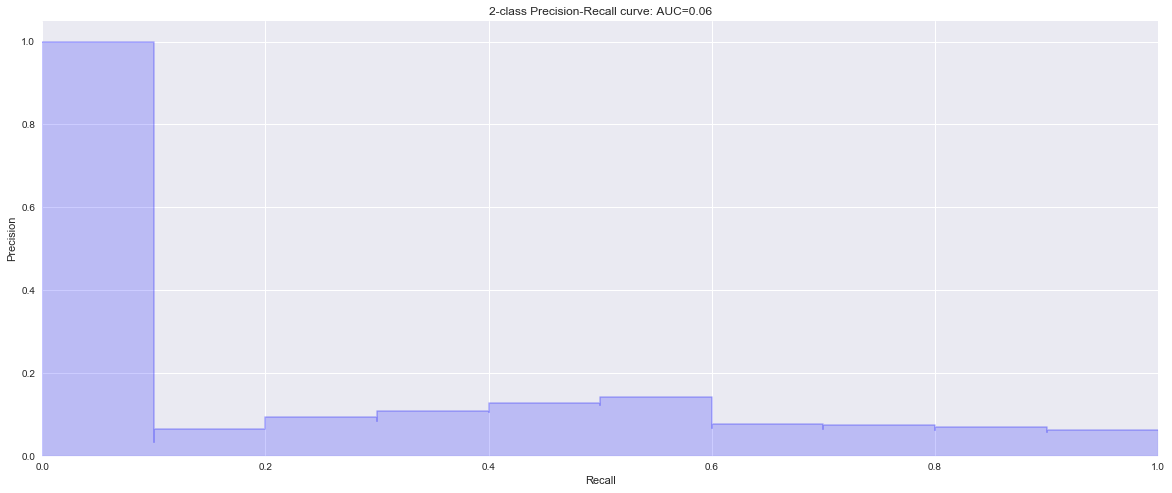

In [273]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_simtest, y_simtest_score_small)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

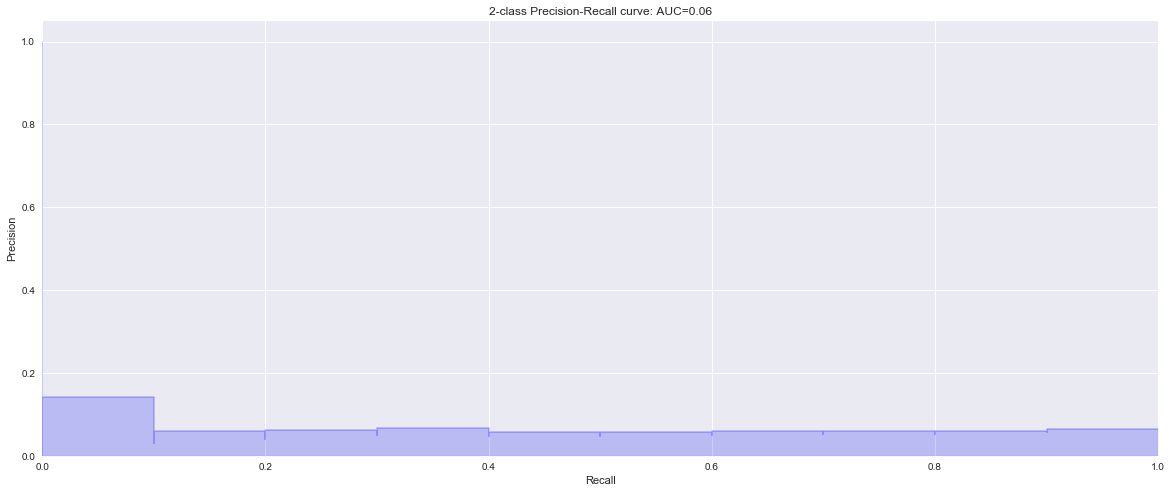

In [275]:
precision, recall, _ = precision_recall_curve(y_simtest, y_simtest_score_init)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

In [274]:
y_simtest

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [263]:
y_simtest_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Below is test cells not working yet

### too many features and the LMNN fails for memory.  our full set 420k+ features when flattened!!! 50 features takes seconds, 500 features takes 5-10minutes

In [81]:
from metric_learn import LMNN
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\metric_learn-0.4.0-py3.6.egg\metric_learn\lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation


MemoryError: 

In [ ]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::8]
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

### Laptop requires shrinking dataset past every 8th column at least, need to attempt on bigger machine 

In [ ]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X_e2c, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

### PCA w sklearn MinMaxScaler()

# not sure if minmaxscaler is correct in this instance since each wavelenght should have the same scale and not treated as independant labels for each column ??? - confirm w Praneeth

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#use this code snip to preprocess data using minmax scalar
min_max_scaler = preprocessing.MinMaxScaler()
d2_X_minmax = min_max_scaler.fit_transform(d2_X)

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
#pca.fit(d2_X)     #this line will run on the flattened d2_X
pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1)

In [ ]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,15])
#note the dimensions start at 0, so 95% is +1

In [ ]:
# we will run PCA formatted to retain 90% of variance by inserting value between 0-1.  
# this will get us to 3D in this short example.
pca = PCA(n_components = 0.90)
X_reduced = pca.fit_transform(d2_X_minmax)
print (X_reduced.shape)
print (X_reduced)

In [ ]:
print ('labels: \n', y)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y, [1,0])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

In [ ]:
plt.figure()

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

In [ ]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

In [ ]:
##########################################################
########################################################

In [317]:
print(type(y))
print (y)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [318]:
y_PC2_predict = list(y)
for lot in range(len(y_PC2_predict)):
    print(X_reduced[lot,1])
    if X_reduced[lot,1] < -5:
        y_PC2_predict[lot] = 1
    else: y_PC2_predict[lot] = 2

print (y_PC2_predict)

-15.1197042761
-16.1250816793
-13.8060115181
-15.4087834833
-13.4318479983
-13.3026303892
-14.1959779852
-13.1129838836
-14.0764751741
-14.1745521828
-12.382628676
-14.4572456073
-13.8314094288
-14.0502025969
-14.3677172281
-13.7063764739
-12.7188157123
-14.2412098302
-14.3682700134
-14.092218741
-14.2276604751
-14.3776827983
-12.5519494434
-14.130798622
-14.2660938892
-12.004997957
-13.3438529114
-12.5130425324
-12.6592240576
-11.5348557129
-11.6700205191
-11.71002454
-11.8441580448
-13.0106382564
-11.6149910891
-9.45915337218
-7.91635561757
-7.73981765586
-5.17713143222
-5.72408160966
-5.69894774542
0.490293397535
-0.127785662143
-0.145784904718
-0.0830755980281
0.904669961178
1.72605602051
-0.112500397732
0.351452504802
3.00017470199
3.36579639284
1.11092634215
3.12978037596
2.96442719305
2.51102900139
2.18316788833
2.66689664996
2.54895897012
2.46645655736
3.30627535929
3.63487490723
3.35580673209
3.3365093673
2.51422758136
3.2832563648
2.30724985809
1.95320715438
2.55453442359
3.0

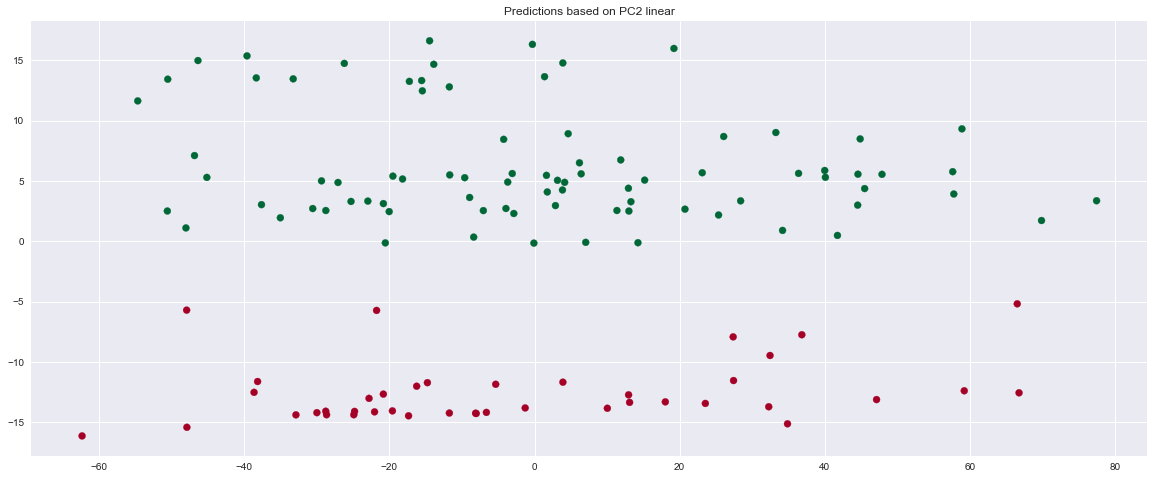

In [319]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_PC2_predict, cmap=plt.cm.RdYlGn)
plt.title("Predictions based on PC2 linear")

In [413]:
#y_lotlabel2 = {}
df1 = pd.DataFrame([y_lotlabel2], columns=y_lotlabel2.keys()).T
df1.reset_index(level=0,inplace=True)
df2 = pd.DataFrame([y_PC2_predict]).T
df3 = pd.concat([df1,df2],axis=1)
df3.columns =['Lot','label','PC2_label']
clas_Errors.Lot = "['IMO"+clas_Errors.Lot+"']"
clas_Errors


,Entity,Lot,Error,Label
Run_On_Ent,,,,
160,7A,['IMO305019'],1.147,0
218,7A,['IMO308131'],1.017,0
223,7A,['IMO308056'],-0.391,0
231,7A,['IMO306885'],0.558,0
268,7A,['IMO308310'],0.622,0
275,7A,['IMO308058'],-0.255,0
278,7A,['IMO307365'],-0.406,0
280,7A,['IMO308059'],-0.189,0
285,7A,['IMO307366'],-0.340,0


In [414]:
match_df = pd.merge(df3, clas_Errors, on = 'Lot')
match_df

,Lot,label,PC2_label,Entity,Error,Label
0,['IMO305019'],0,1,7A,1.147,0
1,['IMO308131'],0,1,7A,1.017,0
2,['IMO308056'],0,1,7A,-0.391,0
3,['IMO306885'],0,1,7A,0.558,0
4,['IMO308310'],0,1,7A,0.622,0
5,['IMO308058'],0,1,7A,-0.255,0
6,['IMO307365'],0,1,7A,-0.406,0
7,['IMO308059'],0,1,7A,-0.189,0
8,['IMO307366'],0,1,7A,-0.340,0
9,['IMO306641'],0,1,7A,0.817,0


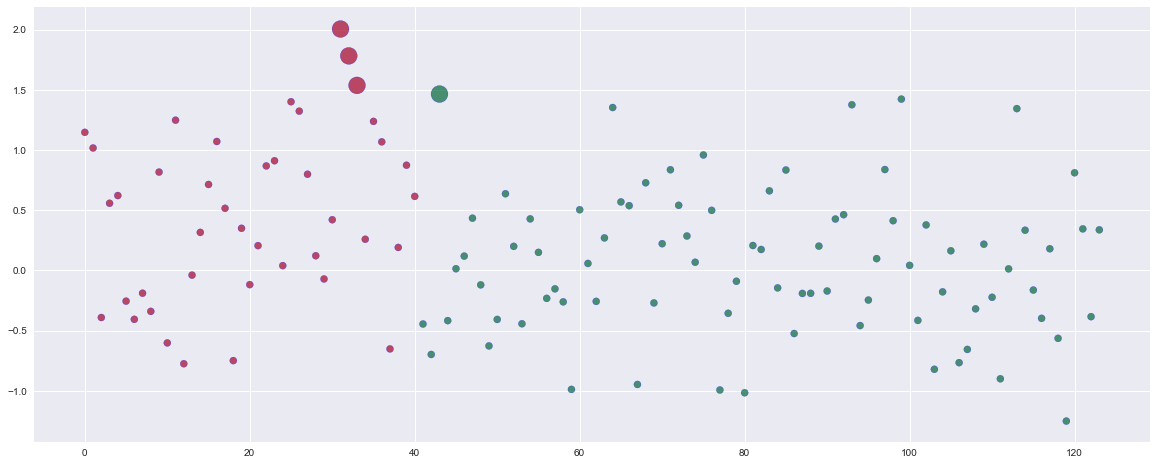

In [418]:
#groups = match_df.groupby('PC2 label')
'''
colors = {'1':'red','2':'blue'}

ax.scatter(x=match_df['Error'], y=match_df.index)#, c=match_df['PC2 label'].apply(lambda x: colors[x]))
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')
plt.show()
'''
#sns.pairplot(x_vars=match_df.index, y_vars=['Error'], data=match_df, hue="PC2_label", size=5)

plt.scatter(match_df.index, match_df['Error'], marker='o', c=match_df['PC2_label'], cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)

#cutoff = 2 * raw_Errors.Error.std()
#match_df.plot(x = match_df.index, y = 'Error', style = 'o', c=match_df.PC2_label)
#plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
#plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [ ]:
##########################################################################
##########################################################################
########################################################################